# I. Import Required Libraries

In [243]:
#Import Required Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)


# II. Import and Overview Data

In [244]:
df_origin = pd.read_csv(r"D:\GitHub\UEL-Course\MLBA\Data\banking.csv", header = 0)
df = df_origin.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

- Không có giá trị Null

In [246]:
dup = df.duplicated()
dup.value_counts()
dup.sum()
if dup.sum() >0:
    print('Cac hang bi trung lap:')
    print(df[dup])

Cac hang bi trung lap:
       age          job   marital            education  default housing loan  \
17977   41   technician   married  professional.course       no     yes   no   
19339   27   technician    single  professional.course       no      no   no   
24769   55     services   married          high.school  unknown      no   no   
25634   39  blue-collar   married             basic.6y       no      no   no   
28143   24     services    single          high.school       no     yes   no   
29352   71      retired    single    university.degree       no      no   no   
29936   45       admin.   married    university.degree       no      no   no   
34333   32   technician    single  professional.course       no     yes   no   
37154   47   technician  divorced          high.school       no     yes   no   
39423   36      retired   married              unknown       no      no   no   
39642   35       admin.   married    university.degree       no     yes   no   
41181   39       

In [247]:
df = df.drop_duplicates()
len(df)

41176

In [248]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [249]:
numerical_cols = df.select_dtypes(include = ['int64', 'float64']).columns
non_numerical_cols = df.select_dtypes(include = ['object']).columns

print(numerical_cols)
print(non_numerical_cols)


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [250]:
for col_name in non_numerical_cols:
    print(f"Unique values in '{col_name}': {df[col_name].unique()}")
    print('-'*20)

Unique values in 'job': ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
--------------------
Unique values in 'marital': ['married' 'single' 'divorced' 'unknown']
--------------------
Unique values in 'education': ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
--------------------
Unique values in 'default': ['unknown' 'no' 'yes']
--------------------
Unique values in 'housing': ['yes' 'no' 'unknown']
--------------------
Unique values in 'loan': ['no' 'yes' 'unknown']
--------------------
Unique values in 'contact': ['cellular' 'telephone']
--------------------
Unique values in 'month': ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
--------------------
Unique values in 'day_of_week': ['thu' 'fri' 'tue' 'mon' 'wed']
--------------------
Unique values in 'poutcome': ['nonexistent' 'success' 'failure']
--

In [251]:
df['education'] = np.where(df['education'] == 'basic.9y', 'Basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.6y', 'Basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.4y', 'Basic', df['education'])

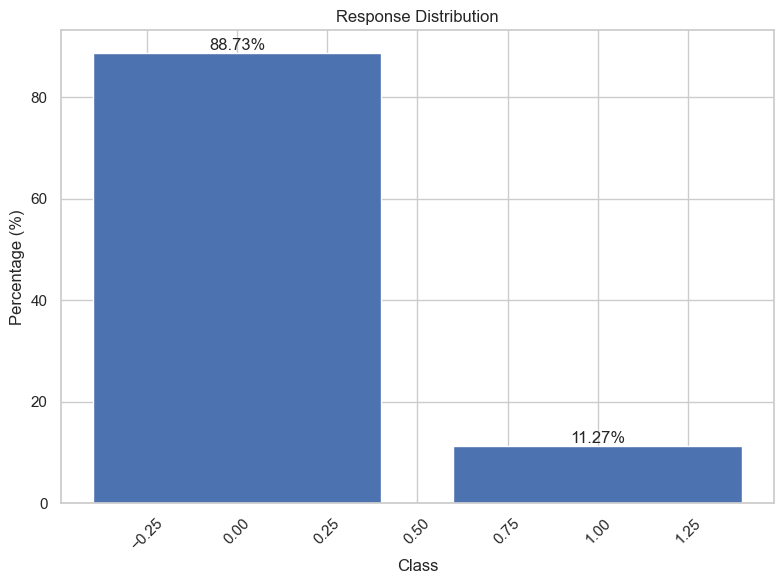

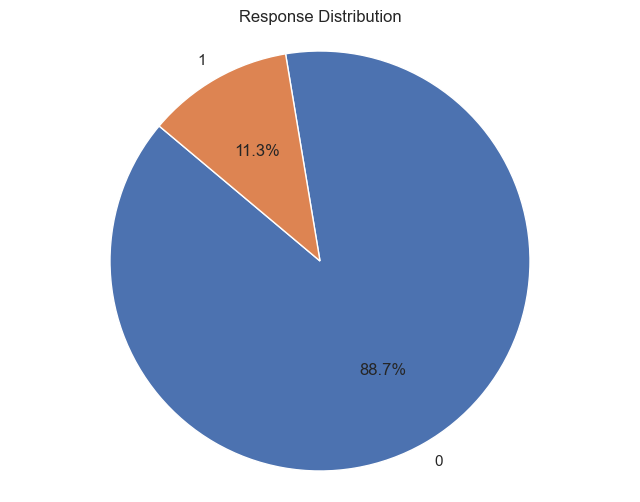

In [252]:
class_distribution = df['y'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.title('Response Distribution')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Response Distribution')
plt.show()

# III. EDA

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp_var_rate    41176 non-null  float64
 16  cons_price_idx  41176 non-null  float64
 17  cons_conf_idx   41176 non-null  floa

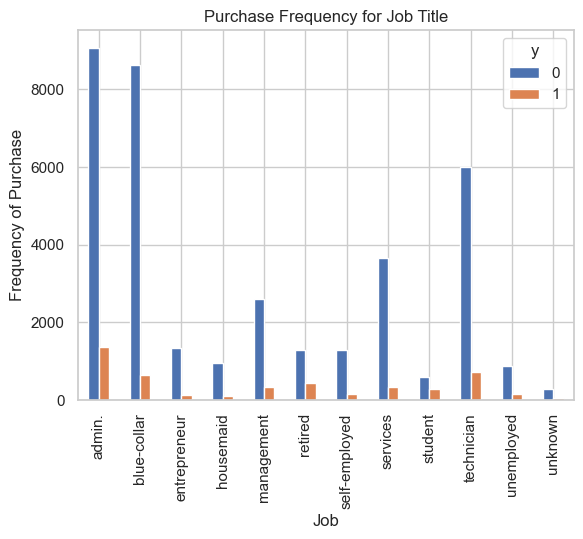

In [254]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

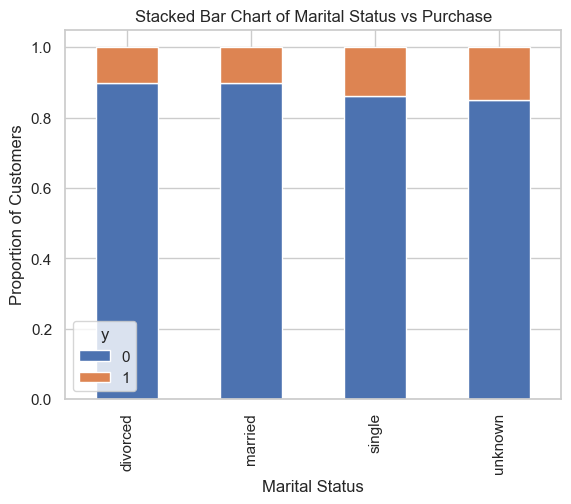

In [255]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

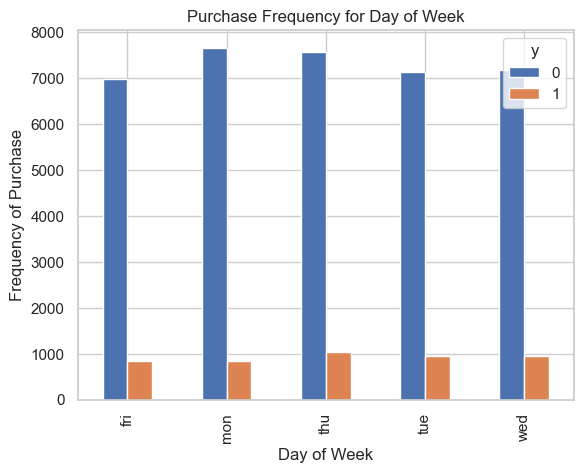

In [256]:
pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

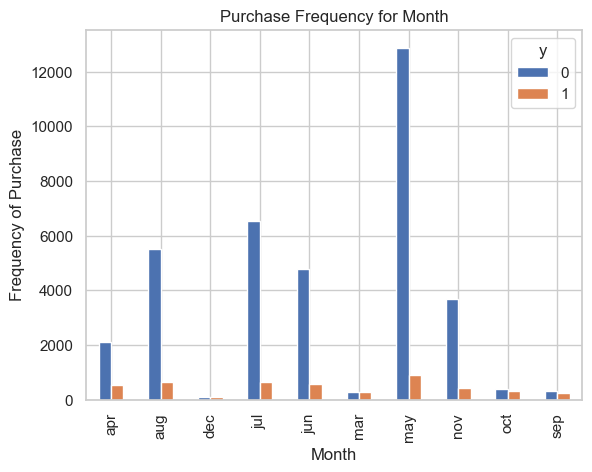

In [257]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

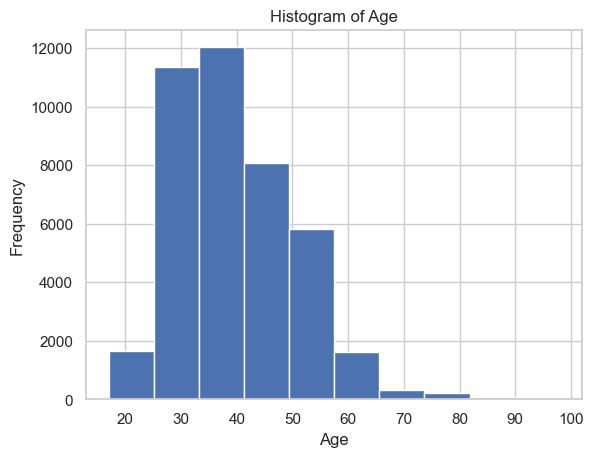

In [258]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

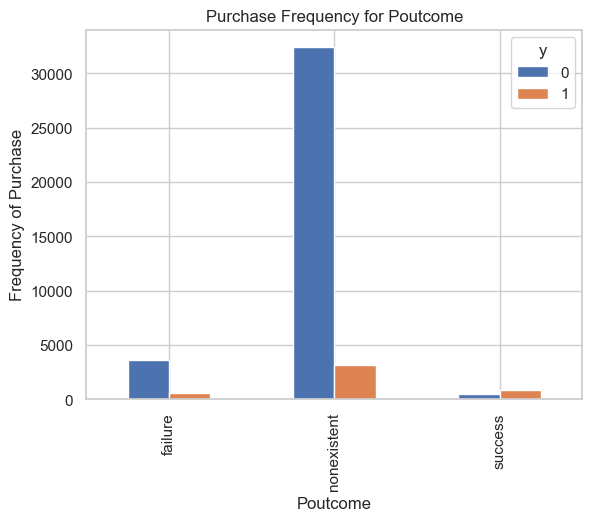

In [259]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

# IV. Data Preprocessing

In [260]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [261]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

In [262]:
columns_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 
                    'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
for column in columns_to_scale:
    df[column] = scaler.fit_transform(df[[column]])

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  float64
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  float64
 11  campaign        41176 non-null  float64
 12  pdays           41176 non-null  float64
 13  previous        41176 non-null  float64
 14  poutcome        41176 non-null  object 
 15  emp_var_rate    41176 non-null  float64
 16  cons_price_idx  41176 non-null  float64
 17  cons_conf_idx   41176 non-null  floa

In [264]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

columns_to_one_hot_encoding = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for col in columns_to_one_hot_encoding:
    one_hot_encoded = pd.get_dummies(df[col], prefix=col)
    df = df.drop(col, axis=1) # Xóa cột gốc
    df = df.join(one_hot_encoded)

In [265]:
# Áp dụng chuyển đổi cho toàn bộ DataFrame
df = df.applymap(lambda x: 1 if x == True else (0 if x == False else x))


C:\Users\thanh\AppData\Local\Temp\ipykernel_6100\2057148309.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x == True else (0 if x == False else x))


# V. Dealing with imbalance data

In [266]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Định nghĩa target column và tách dataset
target_column = 'y'
y = df[target_column]
X = df.drop(target_column, axis=1)

# Chia dataset thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Áp dụng SMOTE để xử lý mất cân bằng lớp
os = SMOTE(random_state=42)
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

# Chuyển kết quả sang DataFrame
os_data_X = pd.DataFrame(data=os_data_X, columns=X_train.columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=[target_column])

# In số liệu dữ liệu sau khi oversampling
length = len(os_data_X)
num_no_sub = len(os_data_y[os_data_y['y'] == 0])
num_sub = len(os_data_y[os_data_y['y'] == 1])
print(f"Length of oversampled data is {length}")
print(f"Number of no subscription in oversampled data {num_no_sub}")
print(f"Number of subscription {num_sub}")
print(f"Proportion of no subscription data in oversampled data is {num_no_sub / length}")
print(f"Proportion of subscription data in oversampled data is {num_sub / length}")


Length of oversampled data is 51144
Number of no subscription in oversampled data 25572
Number of subscription 25572
Proportion of no subscription data in oversampled data is 0.5
Proportion of subscription data in oversampled data is 0.5


In [267]:
X.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
    

In [268]:
from sklearn.feature_selection import RFE
# Initialize the model for RFE
logreg = LogisticRegression()

# Applying RFE with logistic regression as the model and selecting top 20 features
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

# Display the selected features and their rankings
print("Selected features:", rfe.support_)
print("Feature ranking:", rfe.ranking_)

c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Selected features: [False  True False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
  True  True False  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
Feature ranking: [42  1 34 38 39  5  6 37 41 36 18 11  9 14 16 19 10 12 20 17 13 15  1  1
  1  1  1  1 35  1  1  1  4  3 40  1  1  1  2  1  1  8  7 26 29 25 28 23
 30 21 22 24 27  1  1  1  1  1 31 32 33]


c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [269]:
import numpy as np

# Các tên cột từ dữ liệu của bạn
columns = np.array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)

# Ranking của các tính năng tương ứng
feature_ranking = np.array([42,  1, 34, 38, 39,  5,  6, 37, 41, 36, 18, 11,  9, 14, 16, 19, 10, 12, 20, 17, 13, 15,  1,  1,
  1,  1,  1,  1, 35,  1,  1,  1,  4,  3, 40,  1,  1,  1,  2,  1,  1,  8,  7, 26, 29, 25, 28, 23,
 30, 21, 22, 24, 27,  1,  1,  1,  1,  1, 31, 32, 33])

# Lọc ra các cột có ranking bằng 1
columns_to_keep = columns[feature_ranking == 1]

print("Columns to keep:")
print(columns_to_keep)


Columns to keep:
['duration' 'marital_divorced' 'marital_married' 'marital_single'
 'marital_unknown' 'education_Basic' 'education_high.school'
 'education_professional.course' 'education_university.degree'
 'education_unknown' 'housing_no' 'housing_unknown' 'housing_yes'
 'loan_unknown' 'loan_yes' 'day_of_week_fri' 'day_of_week_mon'
 'day_of_week_thu' 'day_of_week_tue' 'day_of_week_wed']


In [270]:
cols = ['duration', 'marital_divorced', 'marital_married', 'marital_single',
 'marital_unknown', 'education_Basic', 'education_high.school',
 'education_professional.course', 'education_university.degree',
 'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes',
 'loan_unknown', 'loan_yes', 'day_of_week_fri', 'day_of_week_mon',
 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']
X = os_data_X[cols]
y = os_data_y['y']


# VI. Implementing the Model

In [271]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.447455
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
==============================================================================
Model:                   Logit                Method:               MLE       
Dependent Variable:      y                    Pseudo R-squared:     0.354     
Date:                    2024-03-15 19:17     AIC:                  45807.3219
No. Observations:        51144                BIC:                  45975.3275
Df Model:                18                   Log-Likelihood:       -22885.   
Df Residuals:            51125                LL-Null:              -35450.   
Converged:               1.0000               LLR p-value:          0.0000    
No. Iterations:          7.0000               Scale:                1.0000    
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------------
duration                      30.4825   0.2997 101.7094 0.0000 29.8951 31.0699
marital_divorced              -0.5637   0.0621  -9.0833 0.0000 -0.6853 -0.4421
marital_married                0.0562   0.0472   1.1912 0.2336 -0.0363  0.1487
marital_single                 0.4126   0.0487   8.4770 0.0000  0.3172  0.5080
marital_unknown               -1.3605   0.4150  -3.2786 0.0010 -2.1738 -0.5472
education_Basic               -1.3977   0.0479 -29.1864 0.0000 -1.4916 -1.3039
education_high.school         -1.0909   0.0479 -22.7711 0.0000 -1.1848 -0.9970
education_professional.course -0.9835   0.0528 -18.6246 0.0000 -1.0870 -0.8800
education_university.degree   -0.5182   0.0450 -11.5257 0.0000 -0.6063 -0.4301
education_unknown             -1.1065   0.0739 -14.9685 0.0000 -1.2514 -0.9616
housing_no                     0.1036   0.0484   2.1415 0.0322  0.0088  0.1985
housing_unknown               -0.2567      nan      nan    nan     nan     nan
housing_yes                    0.3890   0.0476   8.1763 0.0000  0.2957  0.4822
loan_unknown                  -0.2567      nan      nan    nan     nan     nan
loan_yes                      -0.4489   0.0361 -12.4252 0.0000 -0.5197 -0.3781
day_of_week_fri               -1.8850   0.0483 -39.0400 0.0000 -1.9796 -1.7903
day_of_week_mon               -1.8935   0.0474 -39.9173 0.0000 -1.9865 -1.8006
day_of_week_thu               -1.6465   0.0460 -35.7660 0.0000 -1.7367 -1.5563
day_of_week_tue               -1.5423   0.0461 -33.4489 0.0000 -1.6327 -1.4520
day_of_week_wed               -1.8030   0.0471 -38.2463 0.0000 -1.8954 -1.7106
==============================================================================

"""

In [272]:
cols = ['duration', 'marital_divorced',
 'marital_unknown', 'education_Basic', 'education_high.school',
 'education_professional.course', 'education_university.degree',
 'education_unknown', 'housing_no', 'housing_yes', 'loan_yes', 'day_of_week_fri', 'day_of_week_mon',
 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']
X = os_data_X[cols]
y = os_data_y['y']


# VII. Logistic Regression Model Fitting

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [274]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [275]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6898  777]
 [1972 5697]]


In [276]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83      7675
           1       0.88      0.74      0.81      7669

    accuracy                           0.82     15344
   macro avg       0.83      0.82      0.82     15344
weighted avg       0.83      0.82      0.82     15344



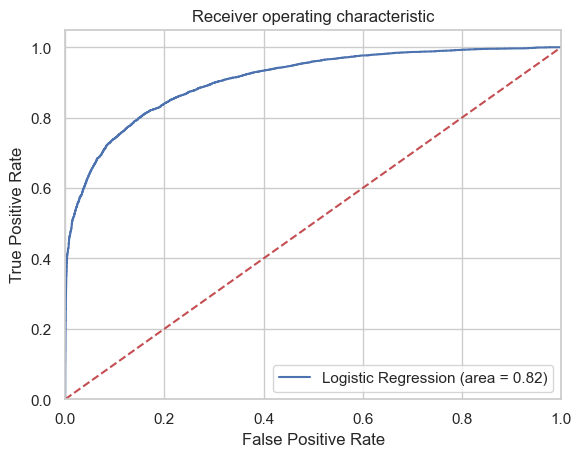

In [277]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()